## Import Library yang digunakan

In [19]:
import re
import pandas as pd
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/dapek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dapek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Memanggil data hasil crawling lalu melihat 5 data teratas

In [20]:
file_path = f"/home/dapek/Documents/TUGAS/PEMROSESAN TEXT/SPX6900-SENTIMENT/tweets-data/spx6900.csv"

df = pd.read_csv(file_path, delimiter=",")

df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1973175314974122373,Tue Sep 30 23:57:09 +0000 2025,1,Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy,1973175314974122373,https://pbs.twimg.com/media/G2IgfOpW4AAR6oX.jpg,NaN,en,NaN,0,1,0,https://x.com/undefined/status/1973175314974122373,1699706276966473728,NaN
1,1973136808931209396,Tue Sep 30 23:54:57 +0000 2025,1,@CountryBitcoin @MustStopMurad Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/tcy8Qgryou,1973174759195288039,https://pbs.twimg.com/media/G2If-6gWoAAIjfT.jpg,CountryBitcoin,en,NaN,0,0,0,https://x.com/undefined/status/1973174759195288039,1699706276966473728,NaN
2,1973174474062307742,Tue Sep 30 23:53:49 +0000 2025,65,Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA,1973174474062307742,https://pbs.twimg.com/media/G2Ifuj9bcAAwRKO.jpg,NaN,en,NaN,0,2,4,https://x.com/undefined/status/1973174474062307742,2834244606,NaN
3,1973172315874832773,Tue Sep 30 23:45:14 +0000 2025,68,BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boomers $SPX within 4 years. Economists are racing to understand how this phenomenon came to fruition.,1973172315874832773,NaN,NaN,en,NaN,0,0,8,https://x.com/undefined/status/1973172315874832773,1508611559932985349,NaN
4,1973171958922813546,Tue Sep 30 23:43:49 +0000 2025,6,Hold on tight! Yes it s been a tough frustrating road but if you are still with us my #SPX6900 friends you are about to be rewarded. Buckle up buttercups on our way to $Trillions. Buy DCA and Hold https://t.co/qLjkxIGubS,1973171958922813546,https://pbs.twimg.com/media/G2IdcIFWcAAAx1W.jpg,NaN,en,NaN,0,0,0,https://x.com/undefined/status/1973171958922813546,1833947475142385664,NaN


## mengambil kolom full_text yang ada pada spx6900.csv yang digunakan untuk pra pemrosesan data

In [21]:
texts = df["full_text"].astype(str)
texts

0                                                           Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy
1                            @CountryBitcoin @MustStopMurad Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/tcy8Qgryou
2                                                                                                                                                     Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA
3       BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boom

#  Pra-Pemrosesan Data

1. **Tokenizer**  
   Digunakan untuk memecah teks menjadi kata-kata (token) dan **mengabaikan tanda baca, emoji, serta simbol**.  
   Contoh:  
   `"Spx6900 is amazing!!! 🚀💰"` → `['Spx6900', 'is', 'amazing']`

2. **Stopwords**  
   Digunakan untuk **menghapus kata-kata umum** yang tidak memiliki makna penting dalam analisis, seperti *“the”, “is”, “and”, “in”*.  
   Tujuannya agar model fokus pada kata-kata bermakna seperti *“crypto”, “market”, “price”*, dsb.

3. **Stemmer**  
   Stemmer digunakan untuk mengubah kata menjadi bentuk dasarnya (root word).  
   Misalnya, kata *“trading”* akan menjadi *“trade”*, atau *“believing”* menjadi *“believ”*.  
   Tujuan dari proses stemming adalah agar berbagai bentuk kata yang memiliki makna sama dapat dianggap sebagai satu representasi yang konsisten dalam analisis.


In [22]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

##  Data Cleaning

Fungsi `clean_text_en()` digunakan untuk melakukan **pembersihan teks (text cleaning)** pada data tweet berbahasa Inggris.  
Tujuannya adalah mengubah teks mentah dari Twitter menjadi bentuk yang lebih bersih, seragam, dan siap untuk analisis sentimen.

### Langkah-langkah Pembersihan

1. **Case Folding**  
   Semua huruf diubah menjadi huruf kecil agar konsisten dan menghindari perbedaan antara huruf besar dan kecil.  
   Contoh: *"Bitcoin"* → *"bitcoin"*.

2. **Menghapus URL dan Mention**  
   URL (tautan) dan mention seperti `@username` dihapus karena tidak memberikan makna semantik penting dalam analisis sentimen.

3. **Konversi Emoji ke Teks**  
   Emoji dikonversi menjadi bentuk teks menggunakan `emoji.demojize()`, misalnya 😀 → `:grinning_face:`.  
   Ini menjaga informasi emosional dari emoji dalam bentuk yang bisa diproses oleh teks.

4. **Menghapus Angka dan Tanda Baca**  
   Semua angka (`\d+`) dan tanda baca (`[^\w\s]`) dihapus untuk menjaga fokus pada kata yang bermakna.

5. **Normalisasi Huruf Berulang**  
   Huruf yang berulang lebih dari dua kali dikurangi menjadi satu kali untuk menghindari distorsi.  
   Contoh: *"cooool"* → *"cool"*.

6. **Penghapusan Spasi Berlebih**  
   Spasi ganda dan spasi di awal/akhir teks dihapus agar teks lebih rapi.

7. **Tokenisasi**  
   Menggunakan `RegexpTokenizer` untuk memecah kalimat menjadi kata (token) sambil mengabaikan tanda baca dan simbol.

8. **Stopword Removal**  
   Menghapus kata-kata umum (seperti “the”, “and”, “is”) yang tidak memiliki kontribusi penting terhadap makna kalimat.

9. **Stemming**  
   Mengubah kata menjadi bentuk dasarnya menggunakan **Porter Stemmer**.  
   Contoh: *"trading"*, *"traded"*, dan *"trades"* → *"trade"*.

In [23]:
def clean_text_en(text):
    text = text.lower()  
    text = re.sub(r'http\S+|www\S+', ' ', text)  # hapus URL
    text = re.sub(r'@\w+', ' ', text)            # hapus mention
    text = emoji.demojize(text)                  # ubah emoji ke teks
    text = re.sub(r'\d+', ' ', text)             # hapus angka
    text = re.sub(r'[^\w\s]', ' ', text)         # hapus tanda baca
    text = re.sub(r'(.)\1{2,}', r'\1', text)     # kurangi huruf berulang
    text = re.sub(r'\s+', ' ', text).strip()     # hapus spasi berlebih
    
    # tokenisasi
    tokens = tokenizer.tokenize(text)
    # hapus stopwords
    tokens = [w for w in tokens if w not in stop_words]
    # stemming
    tokens = [stemmer.stem(w) for w in tokens]
    
    return " ".join(tokens)

## Menampilkan dan mengkomparasi hasil text yang sudah di bersihkan dengan text awal

In [24]:
df["clean_text"] = texts.apply(clean_text_en)
df[["full_text", "clean_text"]].head()

,full_text,clean_text
0,Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy,spx cultur new gener best way make im optimist asset movement mission till flip entir stock market stop trade beliv spx
1,@CountryBitcoin @MustStopMurad Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/tcy8Qgryou,spx cultur new gener best way make im optimist asset movement mission till flip entir stock market stop trade beliv spx
2,Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA,day dca ing spx everi singl day flip stock market persist forev
3,BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boomers $SPX within 4 years. Economists are racing to understand how this phenomenon came to fruition.,break news spx reach market cap could realli rival standard poor current trajectori like flip boomer spx within year economist race understand phenomenon came fruition
4,Hold on tight! Yes it s been a tough frustrating road but if you are still with us my #SPX6900 friends you are about to be rewarded. Buckle up buttercups on our way to $Trillions. Buy DCA and Hold https://t.co/qLjkxIGubS,hold tight ye tough frustrat road still us spx friend reward buckl buttercup way trillion buy dca hold


## Menampilkan Data Secara Lengkap di Pandas

Secara default, Pandas akan memotong (*truncate*) teks yang terlalu panjang pada saat ditampilkan di output.  
Untuk melihat teks tweet secara penuh (tanpa terpotong) maka dilakukan pelebaran pada rows

In [25]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
df[["full_text", "clean_text"]].head(10)

,full_text,clean_text
0,Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy,spx cultur new gener best way make im optimist asset movement mission till flip entir stock market stop trade beliv spx
1,@CountryBitcoin @MustStopMurad Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/tcy8Qgryou,spx cultur new gener best way make im optimist asset movement mission till flip entir stock market stop trade beliv spx
2,Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA,day dca ing spx everi singl day flip stock market persist forev
3,BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boomers $SPX within 4 years. Economists are racing to understand how this phenomenon came to fruition.,break news spx reach market cap could realli rival standard poor current trajectori like flip boomer spx within year economist race understand phenomenon came fruition
4,Hold on tight! Yes it s been a tough frustrating road but if you are still with us my #SPX6900 friends you are about to be rewarded. Buckle up buttercups on our way to $Trillions. Buy DCA and Hold https://t.co/qLjkxIGubS,hold tight ye tough frustrat road still us spx friend reward buckl buttercup way trillion buy dca hold
5,The girl is always cute $SPX #SPX6900 https://t.co/qF6RnHy2Uc,girl alway cute spx spx
6,Beautiful wisdom ️ #SPX6900 #spiritualgold,beauti wisdom spx spiritualgold
7,Have you ever had a job and do you own SPX6900?,ever job spx
8,@dotkrueger Glad you are so bullish on #SPX6900 Fred. Thank you,glad bullish spx fred thank
9,BELIEVE IN SOMETHING BELIEVE IN SOMETHING #SPX6900 https://t.co/t7ViwLy3Ip,believ someth believ someth spx


## 💬 Analisis Sentimen Menggunakan VADER

Tahap selanjutnya adalah melakukan **analisis sentimen** pada teks yang telah dibersihkan.  
Dalam tahap ini digunakan **VADER (Valence Aware Dictionary and sEntiment Reasoner)** — salah satu metode *lexicon-based sentiment analysis* yang populer dan efektif untuk teks berbahasa Inggris, termasuk data media sosial seperti Twitter.

## Kelebihan:
1. **Tidak butuh data training (unsupervised).** 

2. **Mudah diterapkan pada tweet berbahasa Inggris.**

3. **VADER dibuat khusus untuk teks media sosial (ada pengenalan emotikon, kapitalisasi, tanda seru, dll).**

4. **Cepat, ringan, dan hasilnya cukup akurat.**


In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["clean_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

def categorize(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["sentiment_label"] = df["sentiment_score"].apply(categorize)

df[["full_text", "clean_text", "sentiment_score", "sentiment_label"]].head(10)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dapek/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,full_text,clean_text,sentiment_score,sentiment_label
0,Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy,spx cultur new gener best way make im optimist asset movement mission till flip entir stock market stop trade beliv spx,0.8360,positive
1,@CountryBitcoin @MustStopMurad Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/tcy8Qgryou,spx cultur new gener best way make im optimist asset movement mission till flip entir stock market stop trade beliv spx,0.8360,positive
2,Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA,day dca ing spx everi singl day flip stock market persist forev,0.0000,neutral
3,BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boomers $SPX within 4 years. Economists are racing to understand how this phenomenon came to fruition.,break news spx reach market cap could realli rival standard poor current trajectori like flip boomer spx within year economist race understand phenomenon came fruition,-0.1280,negative
4,Hold on tight! Yes it s been a tough frustrating road but if you are still with us my #SPX6900 friends you are about to be rewarded. Buckle up buttercups on our way to $Trillions. Buy DCA and Hold https://t.co/qLjkxIGubS,hold tight ye tough frustrat road still us spx friend reward buckl buttercup way trillion buy dca hold,0.7506,positive
5,The girl is always cute $SPX #SPX6900 https://t.co/qF6RnHy2Uc,girl alway cute spx spx,0.4588,positive
6,Beautiful wisdom ️ #SPX6900 #spiritualgold,beauti wisdom spx spiritualgold,0.5267,positive
7,Have you ever had a job and do you own SPX6900?,ever job spx,0.0000,neutral
8,@dotkrueger Glad you are so bullish on #SPX6900 Fred. Thank you,glad bullish spx fred thank,0.6705,positive
9,BELIEVE IN SOMETHING BELIEVE IN SOMETHING #SPX6900 https://t.co/t7ViwLy3Ip,believ someth believ someth spx,0.0000,neutral


## Visualisasi Data hasil Scoring

In [28]:
print(df["sentiment_label"].value_counts())

sentiment_label
neutral     715
positive    582
negative    203
Name: count, dtype: int64


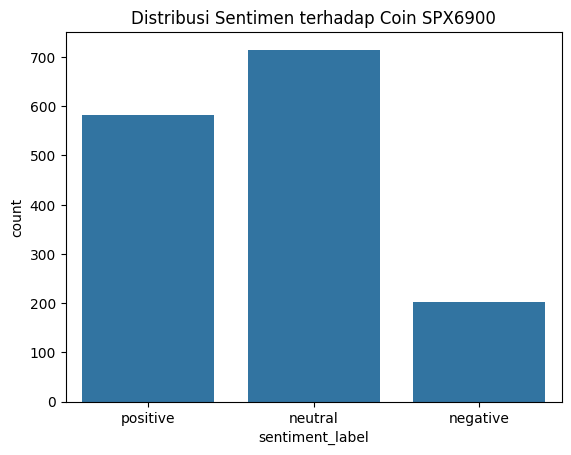

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="sentiment_label", order=["positive", "neutral", "negative"])
plt.title("Distribusi Sentimen terhadap Coin SPX6900")
plt.show()
